# Fecha de entrega: 27/08/2022 (corresponde a clase 20)

# Algoritmo de clasificación: K-Nearest Neighbors

# Diccionario

**BTC_ind_trend_ET_fv** (data set "BTC_ind_trend_ET" reducido según las conclusiones referidas en el punto 7 del documento "Primera entrega")

* Date: fecha en YYYY-MM-DD (object)
* Price: precio de cierre de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
* Open: precio de apertura de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
* High: precio más alto de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
* Low: precio más bajo de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
* Vol.: volumen de BTC (Número de intercambios) en el día de la fecha (float) (Variable numérica continua)
* Percentage_diff: diferencia porcentual del precio de BTC en la fecha [x+1] con respecto a la fecha [x] (float) (Variable numérica continua) 
* Target: 1 indica que en el día de la fecha el precio de BTC subió, y 0 que el precio bajó (float) (Se la tratará como variable categórica)
* EMA_7d: media móvil exponencial de 7 días (USD) (float) (Variable numérica continua)
* HT_TRENDLINE: indicador de Hilbert Transform - Instantaneous Trendline (USD) (float) (Variable numérica continua)
* BBANDS_upper_band: banda superior del indicador Bandas de Bollinger (USD) (float) (Variable numérica continua)
* BBANDS_middle_band: banda media del indicador Bandas de Bollinger (USD) (float) (Variable numérica continua)
* BBANDS_lower_band: banda inferior del indicador Bandas de Bollinger (USD) (float) (Variable numérica continua)
* PSAR: indicador Parabolic SAR (USD) (float) (Variable numérica continua)Price_silver: indica el precio de cierre de la plata en el día de la fecha (float) (USD) (variable numérica continua)
* EMA_7d_ET: valores categóricos de la aplicación de la estrategia de trading EMA de 7 días (comprar, vender, mantener posición) (object) (Variable categórica)
* HT_TRENDLINE_ET: valores categóricos de la aplicación de la estrategia de trading HT Trendline (comprar, vender, mantener posición) (object) (Variable categórica)
* PSAR_ET: valores categóricos de la aplicación de la estrategia de trading PSAR (comprar, vender, mantener posición) (object) (Variable categórica)
* Trend: tendencia de la variable "Price" a lo largo de la serie de tiempo (USD) (Variable categórica continua)
* Residuals: residualidad de la variable "Price" a lo largo de la serie de tiempo (unidad) (Variable categórica continua)

# Librerías

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.cm import ScalarMappable

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Data acquisition

In [2]:
def gdriveColabPath(sharing_url):
  file_id=sharing_url.split('/')[-2]
  dwn_url='https://drive.google.com/uc?id=' + file_id
  return dwn_url

## Adquiriendo BTC_ind_trend_ET_fv

In [3]:
# Se carga la base de datos de BTC_ind_trend_ET_fv desde la carpeta compartida en el Google Drive
sharing_url = "https://drive.google.com/file/d/1P7EPcqZ-CGRcTPqhk1BE9KZNTdysCr4A/view?usp=sharing"

In [4]:
dwn_url=gdriveColabPath(sharing_url)
BTC_ind_trend_fv_df = pd.read_csv(dwn_url, sep=";", decimal=".")
BTC_ind_trend_fv_df.head()

,Date,Price,Open,High,Low,Vol.,Percentage_diff,Target,EMA_7d,HT_TRENDLINE,BBANDS_upper_band,BBANDS_middle_band,BBANDS_lower_band,PSAR,EMA_7d_ET,HTTL_ET,PSAR_ET,Trend,Residuals
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,-19.575231
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,0.0,NaN,NaN,0.1,0.1,0.1,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,15.128694


# Data wrangling

## Análisis pre-modelado

In [5]:
# Registros y columnas
BTC_ind_trend_fv_df.shape

(4386, 19)

In [6]:
# Nombre de columnas
BTC_ind_trend_fv_df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff',
       'Target', 'EMA_7d', 'HT_TRENDLINE', 'BBANDS_upper_band',
       'BBANDS_middle_band', 'BBANDS_lower_band', 'PSAR', 'EMA_7d_ET',
       'HTTL_ET', 'PSAR_ET', 'Trend', 'Residuals'],
      dtype='object')

In [7]:
# Tipos de datos de las variables
BTC_ind_trend_fv_df.dtypes

Date                   object
Price                 float64
Open                  float64
High                  float64
Low                   float64
Vol.                  float64
Percentage_diff       float64
Target                float64
EMA_7d                float64
HT_TRENDLINE          float64
BBANDS_upper_band     float64
BBANDS_middle_band    float64
BBANDS_lower_band     float64
PSAR                  float64
EMA_7d_ET              object
HTTL_ET                object
PSAR_ET                object
Trend                 float64
Residuals             float64
dtype: object

In [8]:
# Columnas y cantidad de registros
BTC_ind_trend_fv_df.count()

Date                  4386
Price                 4386
Open                  4386
High                  4386
Low                   4386
Vol.                  4386
Percentage_diff       4386
Target                4386
EMA_7d                4380
HT_TRENDLINE          4323
BBANDS_upper_band     4382
BBANDS_middle_band    4382
BBANDS_lower_band     4382
PSAR                  4385
EMA_7d_ET             4386
HTTL_ET               4386
PSAR_ET               4386
Trend                 4380
Residuals             4380
dtype: int64

In [9]:
# Valores NaN
BTC_ind_trend_fv_df.isnull().sum()

Date                   0
Price                  0
Open                   0
High                   0
Low                    0
Vol.                   0
Percentage_diff        0
Target                 0
EMA_7d                 6
HT_TRENDLINE          63
BBANDS_upper_band      4
BBANDS_middle_band     4
BBANDS_lower_band      4
PSAR                   1
EMA_7d_ET              0
HTTL_ET                0
PSAR_ET                0
Trend                  6
Residuals              6
dtype: int64

In [10]:
BTC_ind_trend_fv_df.head(10)

,Date,Price,Open,High,Low,Vol.,Percentage_diff,Target,EMA_7d,HT_TRENDLINE,BBANDS_upper_band,BBANDS_middle_band,BBANDS_lower_band,PSAR,EMA_7d_ET,HTTL_ET,PSAR_ET,Trend,Residuals
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,-19.575231
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,0.0,NaN,NaN,0.1,0.1,0.1,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,15.128694
5,2010-07-23,0.1,0.1,0.1,0.1,2400.0,0.0,0.0,NaN,NaN,0.1,0.1,0.1,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,10.352268
6,2010-07-24,0.1,0.1,0.1,0.1,500.0,0.0,0.0,0.1,NaN,0.1,0.1,0.1,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,0.183737
7,2010-07-25,0.1,0.1,0.1,0.1,1550.0,0.0,0.0,0.1,NaN,0.1,0.1,0.1,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,3.979105
8,2010-07-26,0.1,0.1,0.1,0.1,880.0,0.0,0.0,0.1,NaN,0.1,0.1,0.1,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,-8.917886
9,2010-07-27,0.1,0.1,0.1,0.1,3370.0,0.0,0.0,0.1,NaN,0.1,0.1,0.1,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,-1.150686


Observaciones:

Se observaron varios registros NaN en "BTC_ind_trend_ET_fv.csv". 

Esto implica la necesidad de tomar una decisión con respecto a este tipo de valores (instancia previa al modelado). 

Se descarta rellenar los NaN con promedios de valores previos y/o posteriores por varias razones:

1. En las variables [Trend] y [Residuals], 3 de los 6 valores NaN se encuentran al principio de la serie, y los restantes 3 al final de la misma. Esto significa que no se puede hacer un promedio con valores anteriores y posteriores a los valores NaN sino solo con anteriores o posteriores según el caso. Proceder con un promedio con los datos anteriores o posteriores en una serie de tiempo supone un problema extra (¿cuántos valores hacia atrás o hacia adelante se deben tomar?, ¿cuál es el grado de autocorrelación con los valores anteriores o posteriores?, entre otros). 


2. En la variable [Residuals] hay valores positivos y negativos en los registros anteriores y posteriores inmediatos según el caso. Esto también añade un problema extra (¿qué signo se debería utilizar si se rellenan esos casilleros?).


3. Al no tratarse de un problema de regresión lineal del valor que tomaría el precio de BTC en el registro siguiente sino un problema de clasificación, la eliminación de los valores NaN no afectaría en demasía la predicción del modelo a pesar de la autocorrelación referida en el punto 2. Si se considera eliminar los 63 registros NaN (variable -> HT_TRENDLINE) se estarí solamente eliminando un (63*100/4386 =) 1.43 % de los datos.  

Solución: dado que el modelo KNN no acepta valores NaN, por las razones aducidas arriba, se eliminan

## Ultimas manipulaciones pre-modelado

Se reindexa el data set que se modelará a fin de que la variable [Date] funcione como nuevo índice de la base de datos.

In [11]:
# Se crea una copia de BTC_ind_trend_fv_df con nombre BTC_ind_trend y se la reindexa con la variable [Date] como nuevo índice
BTC_ind_trend = BTC_ind_trend_fv_df.set_index("Date")

In [12]:
BTC_ind_trend.tail()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,EMA_7d,HT_TRENDLINE,BBANDS_upper_band,BBANDS_middle_band,BBANDS_lower_band,PSAR,EMA_7d_ET,HTTL_ET,PSAR_ET,Trend,Residuals
Date,,,,,,,,,,,,,,,,,,
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,1.0,20679.126620,20423.078104,21714.292433,20440.38,19166.467567,22017.409626,Mantener_posicion,Mantener_posicion,Mantener_posicion,21370.371429,-160.287691
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,0.0,20705.744965,20403.832160,21359.693563,20731.32,20102.946437,21894.401241,Mantener_posicion,Mantener_posicion,Mantener_posicion,21784.528571,-994.949467
2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,21160.758724,20435.796762,22585.394742,21186.48,19787.565258,18942.200000,Mantener_posicion,Mantener_posicion,Comprar,NaN,NaN
2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,1.0,21723.119043,20547.109474,23836.570363,21751.32,19666.069637,19017.654000,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
2022-07-20,23149.1,23412.0,23429.9,22965.9,290210.0,-1.12,0.0,22079.614282,20712.814316,24304.381782,22216.12,20127.858218,19207.239840,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN


Dado que en la práctica real solo se tiene hasta los valores del registro anterior al que se quiere predecir se intenta hacer un shift (-1) a la variable [Target]. Se entiende que así (en caso de que el modelo prediga con previsibilidad suficiente) se podría estar seguro de que después vendría el valor de [Target] original sin shift (-1).

In [13]:
# Se genera un back up
BTC_ind_trend_2 = BTC_ind_trend.copy()

In [14]:
# Se realiza el shift 
BTC_ind_trend_2 ["Target"] = BTC_ind_trend ["Target"].shift(-1)

In [15]:
BTC_ind_trend_2.tail()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,EMA_7d,HT_TRENDLINE,BBANDS_upper_band,BBANDS_middle_band,BBANDS_lower_band,PSAR,EMA_7d_ET,HTTL_ET,PSAR_ET,Trend,Residuals
Date,,,,,,,,,,,,,,,,,,
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,0.0,20679.126620,20423.078104,21714.292433,20440.38,19166.467567,22017.409626,Mantener_posicion,Mantener_posicion,Mantener_posicion,21370.371429,-160.287691
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,1.0,20705.744965,20403.832160,21359.693563,20731.32,20102.946437,21894.401241,Mantener_posicion,Mantener_posicion,Mantener_posicion,21784.528571,-994.949467
2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,21160.758724,20435.796762,22585.394742,21186.48,19787.565258,18942.200000,Mantener_posicion,Mantener_posicion,Comprar,NaN,NaN
2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,0.0,21723.119043,20547.109474,23836.570363,21751.32,19666.069637,19017.654000,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN
2022-07-20,23149.1,23412.0,23429.9,22965.9,290210.0,-1.12,NaN,22079.614282,20712.814316,24304.381782,22216.12,20127.858218,19207.239840,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN


Se convierten las variables categóricas ([EMA_7d_ET], [HTTL_ET], [PSAR_ET]) en variables dummies y se agregan a BTC_ind_trend_2

In [16]:
Variables = ["EMA_7d_ET", "HTTL_ET", "PSAR_ET"]

for var in Variables:
    dummies = pd.get_dummies(BTC_ind_trend_2 [var])
    dummies = dummies.rename(columns={"Comprar":"Comprar_"+var+"", "Mantener_posicion":"Mantener_posicion_"+var+"", "Vender":"Vender_"+var+""})
    BTC_ind_trend_2 = pd.concat([BTC_ind_trend_2, dummies], axis = 1)

In [17]:
BTC_ind_trend_2.head()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,EMA_7d,HT_TRENDLINE,BBANDS_upper_band,BBANDS_middle_band,BBANDS_lower_band,PSAR,EMA_7d_ET,HTTL_ET,PSAR_ET,Trend,Residuals,Comprar_EMA_7d_ET,Mantener_posicion_EMA_7d_ET,Vender_EMA_7d_ET,Comprar_HTTL_ET,Mantener_posicion_HTTL_ET,Vender_HTTL_ET,Comprar_PSAR_ET,Mantener_posicion_PSAR_ET,Vender_PSAR_ET
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN,0,1,0,0,1,0,0,1,0
2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN,0,1,0,0,1,0,0,1,0
2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,NaN,NaN,0,1,0,0,1,0,0,1,0
2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,-19.575231,0,1,0,0,1,0,0,1,0
2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,0.0,NaN,NaN,0.1,0.1,0.1,0.1,Mantener_posicion,Mantener_posicion,Mantener_posicion,0.1,15.128694,0,1,0,0,1,0,0,1,0


Se eliminan las variables categóricas del BTC_ind_trend_2

In [18]:
BTC_ind_trend_2 = BTC_ind_trend_2.drop(["EMA_7d_ET", "HTTL_ET", "PSAR_ET"], axis=1)

In [19]:
BTC_ind_trend_2.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff', 'Target',
       'EMA_7d', 'HT_TRENDLINE', 'BBANDS_upper_band', 'BBANDS_middle_band',
       'BBANDS_lower_band', 'PSAR', 'Trend', 'Residuals', 'Comprar_EMA_7d_ET',
       'Mantener_posicion_EMA_7d_ET', 'Vender_EMA_7d_ET', 'Comprar_HTTL_ET',
       'Mantener_posicion_HTTL_ET', 'Vender_HTTL_ET', 'Comprar_PSAR_ET',
       'Mantener_posicion_PSAR_ET', 'Vender_PSAR_ET'],
      dtype='object')

Se elimina el registro NaN de la variable [Target] dado que los modelos no pueden procesar este tipo de datos

In [20]:
BTC_ind_trend_2 = BTC_ind_trend_2 [0:4385]

In [21]:
BTC_ind_trend_2.isnull().sum()

Price                           0
Open                            0
High                            0
Low                             0
Vol.                            0
Percentage_diff                 0
Target                          0
EMA_7d                          6
HT_TRENDLINE                   63
BBANDS_upper_band               4
BBANDS_middle_band              4
BBANDS_lower_band               4
PSAR                            1
Trend                           5
Residuals                       5
Comprar_EMA_7d_ET               0
Mantener_posicion_EMA_7d_ET     0
Vender_EMA_7d_ET                0
Comprar_HTTL_ET                 0
Mantener_posicion_HTTL_ET       0
Vender_HTTL_ET                  0
Comprar_PSAR_ET                 0
Mantener_posicion_PSAR_ET       0
Vender_PSAR_ET                  0
dtype: int64

Los valores NaN se deben a las fórmulas de creación de las variables en cuestión.

In [22]:
# Se eliminan todos los registro NaN (explicado arriba)
BTC_ind_trend_2 = BTC_ind_trend_2.dropna()

In [23]:
BTC_ind_trend_2.isnull().sum()

Price                          0
Open                           0
High                           0
Low                            0
Vol.                           0
Percentage_diff                0
Target                         0
EMA_7d                         0
HT_TRENDLINE                   0
BBANDS_upper_band              0
BBANDS_middle_band             0
BBANDS_lower_band              0
PSAR                           0
Trend                          0
Residuals                      0
Comprar_EMA_7d_ET              0
Mantener_posicion_EMA_7d_ET    0
Vender_EMA_7d_ET               0
Comprar_HTTL_ET                0
Mantener_posicion_HTTL_ET      0
Vender_HTTL_ET                 0
Comprar_PSAR_ET                0
Mantener_posicion_PSAR_ET      0
Vender_PSAR_ET                 0
dtype: int64

In [24]:
BTC_ind_trend_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4320 entries, 2010-09-19 to 2022-07-17
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        4320 non-null   float64
 1   Open                         4320 non-null   float64
 2   High                         4320 non-null   float64
 3   Low                          4320 non-null   float64
 4   Vol.                         4320 non-null   float64
 5   Percentage_diff              4320 non-null   float64
 6   Target                       4320 non-null   float64
 7   EMA_7d                       4320 non-null   float64
 8   HT_TRENDLINE                 4320 non-null   float64
 9   BBANDS_upper_band            4320 non-null   float64
 10  BBANDS_middle_band           4320 non-null   float64
 11  BBANDS_lower_band            4320 non-null   float64
 12  PSAR                         4320 non-null   float64
 13  Trend   

# Modelado (KNN)

**...Recordando que...**

*Objetivo general del proyecto*

I.	Diseñar diversos modelos de machine learning capaces de predecir con cierto grado de previsibilidad positiva (>50/55%) el dinamismo del precio de Bitcoin en el corto plazo, es decir, si el precio de este criptoactivo subirá o bajará en la temporalidad estudiada (1 día).

**...Recordando que...**

*Objetivo específico del proyecto*

III.	Diseñar diversos modelos de machine learning capaces de predecir con cierto grado de previsibilidad positiva (>50/55%) y a corto plazo, el movimiento alcista o bajista del precio de BTC.

**Explicación**:

En lo que sigue se procederá a realizar varios modelos supervisados de clasificación de tipo "KNN". 

Estos serán configurados con diversos hiperparámetros a fin de encontrar el resultado más óptimo para este data set.

La variable target del modelo es la columna [Target] de BTC_ind_trend_2.

## Modelo 1

In [25]:
# Se generan las variables X e y (target)
X = BTC_ind_trend_2.drop(["Target"], axis=1)
y = BTC_ind_trend_2["Target"].values.reshape(-1,1)

In [26]:
# Se escalan los datos

escalador = MinMaxScaler()

X = escalador.fit_transform(X)

y= escalador.fit_transform(y)

In [27]:
# Se separa la data en train y test
# Se decide aplicar stratify
(X_train, X_test, y_train, y_test) = train_test_split(X, y,
                                        stratify=y,
                                        test_size=0.3,
                                        random_state=11)

In [28]:
# Se entrena el modelo (k=3)
clasificador = KNeighborsClassifier (n_neighbors=3)

clasificador.fit(X_train, y_train);

In [29]:
y_train_pred = clasificador.predict(X_train) 
train_accuracy = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy)

% de aciertos sobre el set de entrenamiento: 0.7979497354497355


In [30]:
y_test_pred = clasificador.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación es:',test_accuracy)

% de aciertos sobre el set de evaluación es: 0.6049382716049383


Observaciones:
- El modelo tiene un 60% de capacidad de predicción de los próximos registros.
- El modelo presenta overfitting.

## Hyperparameter tuning

In [40]:
# Se instancia el modelo
KNN = KNeighborsClassifier() 

In [47]:
# Se definen los parámetros de búsqueda
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_neighbors': np.arange(1, 100),
    'weights': ['uniform', 'distance', 'callable'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': np.arange(1, 100)
     }

grid_knn = RandomizedSearchCV(KNN, param_grid, scoring='accuracy', n_iter=100, cv=5, verbose=2)

In [48]:
# Se entrena el modelo
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END algorithm=ball_tree, leaf_size=60, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=60, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=60, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=60, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=60, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=26, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=26, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=26, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=26, n_neighbors=19, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=26, n_neighbors=19, weights=distance; total time=

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69,...
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'weights': ['uniform', 'distance',
                                                    'callable']},
                   scoring='accuracy', verbose=2)

In [49]:
# Se obtiene el mejor modelo
print(grid_knn.best_params_)

{'weights': 'distance', 'n_neighbors': 37, 'leaf_size': 20, 'algorithm': 'ball_tree'}


In [50]:
print(grid_knn.best_estimator_)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, n_neighbors=37,
                     weights='distance')


Observación:
- Entendiendo que el mejor modelo tiene un k=37

In [57]:
y_train_pred = grid_knn.predict(X_train) 
train_accuracy = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy)

% de aciertos sobre el set de entrenamiento: 1.0


In [58]:
y_test_pred = grid_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación es:',test_accuracy)

% de aciertos sobre el set de evaluación es: 0.6126543209876543


Observaciones:
- La modificación de los hiperparámetros no mejoró el modelo. No se pudo resolver el overfitting.

[[418 242]
 [260 376]]


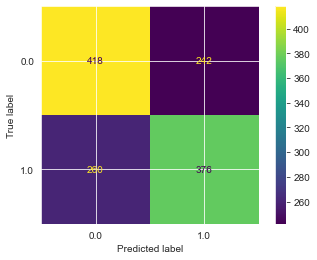

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Predicciones
predictions = grid_knn.predict(X_test)

#Matriz de Confusión
print(confusion_matrix(y_test, predictions))

#Ploteamos la Matriz
plot_confusion_matrix(grid_knn, X_test, y_test)
plt.show()

Observaciones:
- El modelo resulta en muchos falsos positivos y negativos.

Accuracy of the classifier is: 0.6126543209876543
Precision Score of the classifier is: 0.6084142394822006
Recall Score of the classifier is: 0.5911949685534591
F1 Score of the classifier is: 0.5996810207336523
AUC for our classifier is: 0.6660448827901659


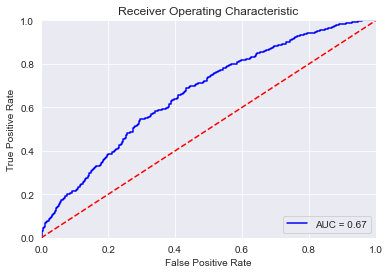

In [60]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = grid_knn.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- El mejor modelo obtenido predice la subida y bajada de BTC en un 61% approx y presenta overfitting.

In [61]:
# Se instancia el modelo
KNN = KNeighborsClassifier() 

In [70]:
# Se definen los parámetros de búsqueda
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_neighbors': np.arange(1, 100),
    'weights': ['uniform', 'distance', 'callable'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': np.arange(1, 100)
     }

grid_knn = RandomizedSearchCV(KNN, param_grid, scoring='accuracy', n_iter=250, cv=5, verbose=2)

In [71]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [72]:
# Se entrena el modelo
grid_knn.fit(X_res, y_res)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[CV] END algorithm=kd_tree, leaf_size=24, n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=24, n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=24, n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=24, n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=24, n_neighbors=50, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=19, n_neighbors=55, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=19, n_neighbors=55, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=19, n_neighbors=55, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=19, n_neighbors=55, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=19, n_neighbors=55, weights=uniform; total time=   0

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=250,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69,...
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'weights': ['uniform', 'distance',
                                                    'callable']},
                   scoring='accuracy', verbose=2)

In [73]:
# Se obtiene el mejor modelo
print(grid_knn.best_params_)

{'weights': 'distance', 'n_neighbors': 12, 'leaf_size': 80, 'algorithm': 'brute'}


In [74]:
print(grid_knn.best_estimator_)

KNeighborsClassifier(algorithm='brute', leaf_size=80, n_neighbors=12,
                     weights='distance')


Observación:
- Entendiendo que el mejor modelo tiene un k=12

In [75]:
y_train_pred = grid_knn.predict(X_train) 
train_accuracy = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy)

% de aciertos sobre el set de entrenamiento: 1.0


In [76]:
y_test_pred = grid_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación es:',test_accuracy)

% de aciertos sobre el set de evaluación es: 0.6103395061728395


Observaciones:
- La modificación de los hiperparámetros no mejoró el modelo. No se pudo resolver el overfitting.

[[388 272]
 [233 403]]


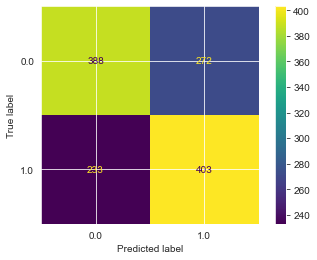

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Predicciones
predictions = grid_knn.predict(X_test)

#Matriz de Confusión
print(confusion_matrix(y_test, predictions))

#Ploteamos la Matriz
plot_confusion_matrix(grid_knn, X_test, y_test)
plt.show()

Observaciones:
- El modelo resulta en muchos falsos positivos y negativos.

Accuracy of the classifier is: 0.6103395061728395
Precision Score of the classifier is: 0.597037037037037
Recall Score of the classifier is: 0.6336477987421384
F1 Score of the classifier is: 0.614797864225782
AUC for our classifier is: 0.6568670192490946


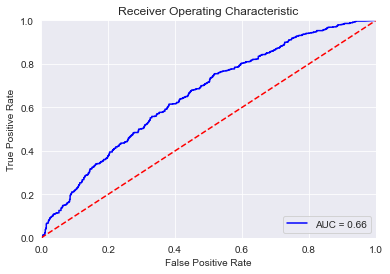

In [78]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = grid_knn.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- El mejor modelo obtenido predice la subida y bajada de BTC en un 61% approx.

In [79]:
BTC_ind_trend_2.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Percentage_diff', 'Target',
       'EMA_7d', 'HT_TRENDLINE', 'BBANDS_upper_band', 'BBANDS_middle_band',
       'BBANDS_lower_band', 'PSAR', 'Trend', 'Residuals', 'Comprar_EMA_7d_ET',
       'Mantener_posicion_EMA_7d_ET', 'Vender_EMA_7d_ET', 'Comprar_HTTL_ET',
       'Mantener_posicion_HTTL_ET', 'Vender_HTTL_ET', 'Comprar_PSAR_ET',
       'Mantener_posicion_PSAR_ET', 'Vender_PSAR_ET'],
      dtype='object')

In [80]:
BTC_ind_trend_2 = BTC_ind_trend_2.drop (['Comprar_EMA_7d_ET',
       'Mantener_posicion_EMA_7d_ET', 'Vender_EMA_7d_ET', 'Comprar_HTTL_ET',
       'Mantener_posicion_HTTL_ET', 'Vender_HTTL_ET', 'Comprar_PSAR_ET',
       'Mantener_posicion_PSAR_ET', 'Vender_PSAR_ET'], axis=1)

In [81]:
BTC_ind_trend_2.tail()

,Price,Open,High,Low,Vol.,Percentage_diff,Target,EMA_7d,HT_TRENDLINE,BBANDS_upper_band,BBANDS_middle_band,BBANDS_lower_band,PSAR,Trend,Residuals
Date,,,,,,,,,,,,,,,
2022-07-13,20250.0,19331.6,20250.8,18942.2,249380.0,4.75,1.0,20330.759396,20482.293636,21936.320395,20395.80,18855.279605,22418.050000,20430.357143,-199.932374
2022-07-14,20586.0,20250.0,20862.2,19664.9,205280.0,1.66,1.0,20394.569547,20473.079091,21246.948738,20195.50,19144.051262,22279.016000,20421.528571,179.600123
2022-07-15,20825.1,20586.1,21178.1,20393.4,164670.0,1.16,1.0,20502.202160,20452.101775,21231.522062,20191.04,19150.557938,22145.543360,20787.614286,47.837982
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,0.0,20679.126620,20423.078104,21714.292433,20440.38,19166.467567,22017.409626,21370.371429,-160.287691
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,1.0,20705.744965,20403.832160,21359.693563,20731.32,20102.946437,21894.401241,21784.528571,-994.949467


In [82]:
# Se generan las variables X e y (target)
X = BTC_ind_trend_2.drop(["Target"], axis=1)
y = BTC_ind_trend_2["Target"].values.reshape(-1,1)

# Se escalan los datos
escalador = MinMaxScaler()

X = escalador.fit_transform(X)

y= escalador.fit_transform(y)

In [83]:
# Se separa la data en train y test
# Se decide aplicar stratify
(X_train, X_test, y_train, y_test) = train_test_split(X, y,
                                        stratify=y,
                                        test_size=0.3,
                                        random_state=11)

In [84]:
# Se instancia el modelo
KNN = KNeighborsClassifier() 

In [85]:
# Se definen los parámetros de búsqueda
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_neighbors': np.arange(1, 100),
    'weights': ['uniform', 'distance', 'callable'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': np.arange(1, 100)
     }

grid_knn = RandomizedSearchCV(KNN, param_grid, scoring='accuracy', n_iter=250, cv=5, verbose=2)

In [86]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [87]:
# Se entrena el modelo
grid_knn.fit(X_res, y_res)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[CV] END algorithm=brute, leaf_size=23, n_neighbors=58, weights=callable; total time=   0.0s
[CV] END algorithm=brute, leaf_size=23, n_neighbors=58, weights=callable; total time=   0.0s
[CV] END algorithm=brute, leaf_size=23, n_neighbors=58, weights=callable; total time=   0.0s
[CV] END algorithm=brute, leaf_size=23, n_neighbors=58, weights=callable; total time=   0.0s
[CV] END algorithm=brute, leaf_size=23, n_neighbors=58, weights=callable; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=54, n_neighbors=36, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=54, n_neighbors=36, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=54, n_neighbors=36, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=54, n_neighbors=36, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=54, n_neighbors=36, weights=uniform; total time

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=250,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69,...
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'weights': ['uniform', 'distance',
                                                    'callable']},
                   scoring='accuracy', verbose=2)

In [88]:
# Se obtiene el mejor modelo
print(grid_knn.best_params_)

{'weights': 'distance', 'n_neighbors': 42, 'leaf_size': 11, 'algorithm': 'brute'}


In [89]:
print(grid_knn.best_estimator_)

KNeighborsClassifier(algorithm='brute', leaf_size=11, n_neighbors=42,
                     weights='distance')


Observación:
- Entendiendo que el mejor modelo tiene un k=42

In [90]:
y_train_pred = grid_knn.predict(X_train) 
train_accuracy = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy)

% de aciertos sobre el set de entrenamiento: 1.0


In [91]:
y_test_pred = grid_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación es:',test_accuracy)

% de aciertos sobre el set de evaluación es: 0.6396604938271605


Observaciones:
- La modificación de los hiperparámetros no mejoró el modelo. No se pudo resolver el overfitting.

[[406 254]
 [213 423]]


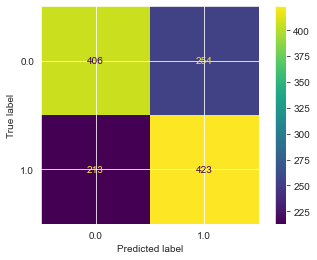

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Predicciones
predictions = grid_knn.predict(X_test)

#Matriz de Confusión
print(confusion_matrix(y_test, predictions))

#Ploteamos la Matriz
plot_confusion_matrix(grid_knn, X_test, y_test)
plt.show()

Observaciones:
- El modelo resulta en muchos falsos positivos y negativos.

Accuracy of the classifier is: 0.6396604938271605
Precision Score of the classifier is: 0.6248153618906942
Recall Score of the classifier is: 0.6650943396226415
F1 Score of the classifier is: 0.6443259710586443
AUC for our classifier is: 0.7078783114160472


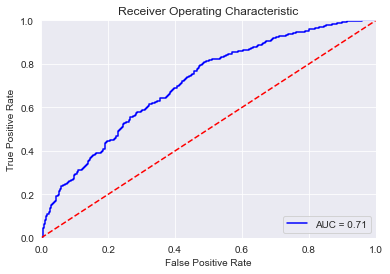

In [93]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = grid_knn.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- No se pudo resolver el overfitting pero se mejoró 1% el modelo (accuracy).